## Creates its own text from other text. 
Create your story from a children's story 

In [1]:
#import
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np 

In [2]:
# Each word with its code.
tokenizer= Tokenizer()
# Story:
data="Hubo una vez una princesa increíblemente rica, bella y sabia.\nCansada de pretendientes falsos que se acercaban a ella para conseguir sus riquezas, hizo publicar que se casaría con quien le llevase el regalo más valioso, tierno y sincero a la vez. El palacio se llenó de flores y regalos de todos los tipos y colores, de cartas de amor incomparables y de poetas enamorados. Y entre todos aquellos regalos magníficos, descubrió una piedra; una simple y sucia piedra. Intrigada, hizo llamar a quien se la había regalado. A pesar de su curiosidad, mostró estar muy ofendida cuando apareció el joven, y este se explicó diciendo:- Esa piedra representa lo más valioso que os puedo regalar, princesa: es mi corazón.\n Y también es sincera, porque aún no es vuestro y es duro como una piedra. Sólo cuando se llene de amor se ablandará y será más tierno que ningún otro.\nEl joven se marchó tranquilamente, dejando a la princesa sorprendida y atrapada.\n Quedó tan enamorada que llevaba consigo la piedra a todas partes, y durante meses llenó al joven de regalos y atenciones, pero su corazón seguía siendo duro como la piedra en sus manos. Desanimada, terminó por arrojar la piedra al fuego; al momento vio cómo se deshacía la arena, y de aquella piedra tosca surgía una bella figura de oro. Entonces comprendió que ella misma tendría que ser como el fuego, y transformar cuanto tocaba separando lo inútil de lo importante.\nDurante los meses siguientes, la princesa se propuso cambiar en el reino, y como con la piedra, dedicó su vida, su sabiduría y sus riquezas a separar lo inútil de lo importante.\n Acabó con el lujo, las joyas y los excesos, y las gentes del país tuvieron comida y libros. Cuantos trataban con la princesa salían encantados por su carácter y cercanía, y su sola prensencia transmitía tal calor humano y pasión por cuanto hacía, que comenzaron a llamarla cariñosamente 'La princesa de fuego'.\nY como con la piedra, su fuego deshizo la dura corteza del corazón del joven, que tal y como había prometido, resultó ser tan tierno y justo que hizo feliz a la princesa hasta el fin de sus días"
corpus=data.lower().split("\n")
tokenizer.fit_on_texts(corpus)
total_words= len(tokenizer.word_index)+1
print(tokenizer.word_index)
print(total_words)


{'y': 1, 'de': 2, 'la': 3, 'que': 4, 'se': 5, 'piedra': 6, 'a': 7, 'el': 8, 'princesa': 9, 'su': 10, 'una': 11, 'como': 12, 'con': 13, 'lo': 14, 'sus': 15, 'joven': 16, 'es': 17, 'hizo': 18, 'más': 19, 'tierno': 20, 'regalos': 21, 'los': 22, 'corazón': 23, 'al': 24, 'por': 25, 'fuego': 26, 'del': 27, 'vez': 28, 'bella': 29, 'ella': 30, 'riquezas': 31, 'quien': 32, 'valioso': 33, 'llenó': 34, 'todos': 35, 'amor': 36, 'había': 37, 'cuando': 38, 'duro': 39, 'tan': 40, 'durante': 41, 'meses': 42, 'en': 43, 'ser': 44, 'cuanto': 45, 'inútil': 46, 'importante': 47, 'las': 48, 'tal': 49, 'hubo': 50, 'increíblemente': 51, 'rica': 52, 'sabia': 53, 'cansada': 54, 'pretendientes': 55, 'falsos': 56, 'acercaban': 57, 'para': 58, 'conseguir': 59, 'publicar': 60, 'casaría': 61, 'le': 62, 'llevase': 63, 'regalo': 64, 'sincero': 65, 'palacio': 66, 'flores': 67, 'tipos': 68, 'colores': 69, 'cartas': 70, 'incomparables': 71, 'poetas': 72, 'enamorados': 73, 'entre': 74, 'aquellos': 75, 'magníficos': 76, 'd

In [4]:
input_sequences=[]
for line in corpus:
    token_list=tokenizer.texts_to_sequences([line])[0]
    for i in range(1,len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)
        
#pad sequences
max_sequences_len=max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequences_len, padding='pre'))


# create predictors and label
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]
ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)
ys

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [5]:
#look the number of this words:
print(tokenizer.word_index['cartas'])
print(tokenizer.word_index['estar'])
print(tokenizer.word_index['hizo'])

70
86
18


In [6]:
print(xs[6])

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0 50 11 28 11  9 51 52]


In [7]:
# Model:
model = Sequential()
model.add(Embedding(total_words, 64, input_length=max_sequences_len-1))
model.add(Bidirectional(LSTM(20)))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(xs, ys, epochs=500, verbose=1)

Epoch 1/500
12/12 [==============================] - 1s 60ms/step - loss: 5.2543 - accuracy: 0.0251
Epoch 2/500
12/12 [==============================] - 1s 55ms/step - loss: 5.2314 - accuracy: 0.0698
Epoch 3/500
12/12 [==============================] - 1s 54ms/step - loss: 5.1863 - accuracy: 0.0698 0s - loss: 5.204
Epoch 4/500
12/12 [==============================] - 1s 59ms/step - loss: 5.0817 - accuracy: 0.0698
Epoch 5/500
12/12 [==============================] - 1s 58ms/step - loss: 4.9303 - accuracy: 0.0698
Epoch 6/500
12/12 [==============================] - 1s 72ms/step - loss: 4.8346 - accuracy: 0.0698
Epoch 7/500
12/12 [==============================] - 1s 66ms/step - loss: 4.7937 - accuracy: 0.0698
Epoch 8/500
12/12 [==============================] - 1s 71ms/step - loss: 4.7715 - accuracy: 0.0698
Epoch 9/500
12/12 [==============================] - 1s 68ms/step - loss: 4.7535 - accuracy: 0.0698
Epoch 10/500
12/12 [==============================] - 1s 71ms/step - loss: 4.7362 -

12/12 [==============================] - 1s 82ms/step - loss: 2.8004 - accuracy: 0.3073 0s - loss: 2.8091 - 
Epoch 80/500
12/12 [==============================] - 1s 78ms/step - loss: 2.7822 - accuracy: 0.3184
Epoch 81/500
12/12 [==============================] - 1s 68ms/step - loss: 2.7566 - accuracy: 0.3212
Epoch 82/500
12/12 [==============================] - 1s 68ms/step - loss: 2.7335 - accuracy: 0.3268
Epoch 83/500
12/12 [==============================] - 1s 68ms/step - loss: 2.7097 - accuracy: 0.3296
Epoch 84/500
12/12 [==============================] - 1s 75ms/step - loss: 2.6889 - accuracy: 0.3408
Epoch 85/500
12/12 [==============================] - 1s 69ms/step - loss: 2.6632 - accuracy: 0.3436
Epoch 86/500
12/12 [==============================] - 1s 68ms/step - loss: 2.6462 - accuracy: 0.3492
Epoch 87/500
12/12 [==============================] - 1s 69ms/step - loss: 2.6228 - accuracy: 0.3520
Epoch 88/500
12/12 [==============================] - 1s 71ms/step - loss: 2.5995 -

12/12 [==============================] - 1s 71ms/step - loss: 1.4409 - accuracy: 0.8045
Epoch 159/500
12/12 [==============================] - 1s 91ms/step - loss: 1.4317 - accuracy: 0.7961
Epoch 160/500
12/12 [==============================] - 1s 69ms/step - loss: 1.4196 - accuracy: 0.7961
Epoch 161/500
12/12 [==============================] - 1s 66ms/step - loss: 1.4059 - accuracy: 0.8128
Epoch 162/500
12/12 [==============================] - 1s 99ms/step - loss: 1.3945 - accuracy: 0.8240
Epoch 163/500
12/12 [==============================] - 1s 102ms/step - loss: 1.3802 - accuracy: 0.82960s - loss: 1.3133 - accuracy: 0. - ETA: 0s - loss: 1.3309 - accu
Epoch 164/500
12/12 [==============================] - 1s 72ms/step - loss: 1.3714 - accuracy: 0.8212
Epoch 165/500
12/12 [==============================] - 1s 80ms/step - loss: 1.3703 - accuracy: 0.8101
Epoch 166/500
12/12 [==============================] - 1s 74ms/step - loss: 1.3552 - accuracy: 0.8268
Epoch 167/500
12/12 [==========

Epoch 237/500
12/12 [==============================] - 1s 69ms/step - loss: 0.7332 - accuracy: 0.9777
Epoch 238/500
12/12 [==============================] - 1s 70ms/step - loss: 0.7248 - accuracy: 0.9749
Epoch 239/500
12/12 [==============================] - 1s 67ms/step - loss: 0.7190 - accuracy: 0.9749
Epoch 240/500
12/12 [==============================] - 1s 67ms/step - loss: 0.7152 - accuracy: 0.9777
Epoch 241/500
12/12 [==============================] - 1s 72ms/step - loss: 0.7086 - accuracy: 0.9749
Epoch 242/500
12/12 [==============================] - 1s 68ms/step - loss: 0.7016 - accuracy: 0.9749
Epoch 243/500
12/12 [==============================] - 1s 70ms/step - loss: 0.6971 - accuracy: 0.9721
Epoch 244/500
12/12 [==============================] - 1s 69ms/step - loss: 0.6904 - accuracy: 0.9749
Epoch 245/500
12/12 [==============================] - 1s 65ms/step - loss: 0.6836 - accuracy: 0.9749
Epoch 246/500
12/12 [==============================] - 1s 66ms/step - loss: 0.6803

12/12 [==============================] - 1s 80ms/step - loss: 0.3837 - accuracy: 0.9916
Epoch 318/500
12/12 [==============================] - 1s 69ms/step - loss: 0.3804 - accuracy: 0.9916
Epoch 319/500
12/12 [==============================] - 1s 67ms/step - loss: 0.3767 - accuracy: 0.9916
Epoch 320/500
12/12 [==============================] - 1s 68ms/step - loss: 0.3769 - accuracy: 0.9916
Epoch 321/500
12/12 [==============================] - 1s 65ms/step - loss: 0.3750 - accuracy: 0.9916
Epoch 322/500
12/12 [==============================] - 1s 69ms/step - loss: 0.3722 - accuracy: 0.9916
Epoch 323/500
12/12 [==============================] - 1s 63ms/step - loss: 0.3750 - accuracy: 0.9916
Epoch 324/500
12/12 [==============================] - 1s 65ms/step - loss: 0.3696 - accuracy: 0.9916
Epoch 325/500
12/12 [==============================] - 1s 65ms/step - loss: 0.3650 - accuracy: 0.9888
Epoch 326/500
12/12 [==============================] - 1s 68ms/step - loss: 0.3647 - accuracy: 0

12/12 [==============================] - 1s 82ms/step - loss: 0.2149 - accuracy: 0.9944
Epoch 397/500
12/12 [==============================] - 1s 71ms/step - loss: 0.2144 - accuracy: 0.9944
Epoch 398/500
12/12 [==============================] - 1s 69ms/step - loss: 0.2130 - accuracy: 0.9944
Epoch 399/500
12/12 [==============================] - 1s 66ms/step - loss: 0.2108 - accuracy: 0.9944
Epoch 400/500
12/12 [==============================] - 1s 68ms/step - loss: 0.2086 - accuracy: 0.9944
Epoch 401/500
12/12 [==============================] - 1s 66ms/step - loss: 0.2074 - accuracy: 0.9944
Epoch 402/500
12/12 [==============================] - 1s 68ms/step - loss: 0.2065 - accuracy: 0.9944
Epoch 403/500
12/12 [==============================] - 1s 64ms/step - loss: 0.2062 - accuracy: 0.9944
Epoch 404/500
12/12 [==============================] - 1s 66ms/step - loss: 0.2040 - accuracy: 0.9916
Epoch 405/500
12/12 [==============================] - 1s 63ms/step - loss: 0.2021 - accuracy: 0

12/12 [==============================] - 1s 61ms/step - loss: 0.1274 - accuracy: 0.9972
Epoch 476/500
12/12 [==============================] - 1s 60ms/step - loss: 0.1266 - accuracy: 0.9972
Epoch 477/500
12/12 [==============================] - 1s 59ms/step - loss: 0.1258 - accuracy: 0.9972
Epoch 478/500
12/12 [==============================] - 1s 70ms/step - loss: 0.1246 - accuracy: 0.9972
Epoch 479/500
12/12 [==============================] - 1s 69ms/step - loss: 0.1240 - accuracy: 0.9972
Epoch 480/500
12/12 [==============================] - 1s 72ms/step - loss: 0.1233 - accuracy: 0.9972
Epoch 481/500
12/12 [==============================] - 1s 110ms/step - loss: 0.1225 - accuracy: 0.9972
Epoch 482/500
12/12 [==============================] - 1s 86ms/step - loss: 0.1215 - accuracy: 0.9972
Epoch 483/500
12/12 [==============================] - 1s 68ms/step - loss: 0.1204 - accuracy: 0.9972
Epoch 484/500
12/12 [==============================] - 1s 72ms/step - loss: 0.1200 - accuracy: 

In [8]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

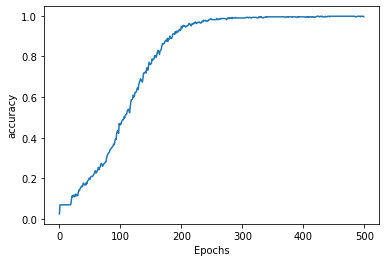

In [9]:
plot_graphs(history, 'accuracy')

In [10]:
# Create your story:
seed_text = "la princesa se casara con "
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequences_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
la princesa se casara con  una vez una piedra sólo cuando se llene de amor se ablandará y será más tierno que ningún otro otro otro otro otro otro otro feliz a 'la princesa de fuego' días otro prensencia justo ningún otro feliz a la princesa de lo inútil de lo importante de hacía que ser tocaba el prensencia prensencia prensencia prensencia justo feliz princesa más que llamarla 'la princesa de fuego' entonces misma tendría que ser como y transformar cuanto tocaba separando lo inútil de lo importante importante importante entonces que inútil de lo importante que inútil de lo importante que inútil de lo
